# Roaming Heat Map

In [1]:
# TO show the roaming traffic within a certain time period

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Data Processing

In [3]:
#Load in Roamed File
roam_file = "../sortlog/h3c-wx7-20161118/h3c-wx7-20161118-info-formatted/h3c-wx7-20161118-roamed-formatted.csv"
roam_df = pd.read_csv(roam_file, engine='python')
roam_df.head(5)

,Time,StatusCode,UserMacAddress,FromMacAddress,FromAPID,ToMacAddress,ToAPID
0,00:00:01,Roamed,58:44:98:21:F3:AD,80:F6:2E:53:E8:53,604,80:F6:2E:53:57:23,603
1,00:00:14,Roamed,58:44:98:21:F3:AD,80:F6:2E:53:57:23,603,00:23:89:60:77:63,194
2,00:00:35,Roamed,DC:41:5F:D9:67:DE,00:23:89:6A:B8:E3,106,80:F6:2E:53:57:23,603
3,00:00:49,Roamed,48:3B:38:09:1F:F8,58:66:BA:AB:71:E2,102,00:23:89:6A:BF:B2,205
4,00:00:52,Roamed,48:3B:38:09:1F:F8,00:23:89:6A:BF:B2,205,58:66:BA:AB:71:F2,102


In [4]:
roam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25365 entries, 0 to 25364
Data columns (total 7 columns):
Time              25365 non-null object
StatusCode        25365 non-null object
UserMacAddress    25365 non-null object
FromMacAddress    25365 non-null object
FromAPID          25365 non-null int64
ToMacAddress      25365 non-null object
ToAPID            25365 non-null int64
dtypes: int64(2), object(5)
memory usage: 891.8+ KB


In [5]:
# View record of a single user
result = roam_df.where(roam_df["UserMacAddress"]=="CC:20:E8:A8:98:D4") 
result.dropna(inplace=True)
result.head(5)

,Time,StatusCode,UserMacAddress,FromMacAddress,FromAPID,ToMacAddress,ToAPID
15008,16:00:56,Roamed,CC:20:E8:A8:98:D4,00:23:89:4D:3C:32,192.0,00:23:89:6A:B2:C2,110.0
15020,16:01:19,Roamed,CC:20:E8:A8:98:D4,00:23:89:6A:B2:C2,110.0,00:23:89:4D:3C:22,192.0
15235,16:08:16,Roamed,CC:20:E8:A8:98:D4,00:23:89:4D:3C:22,192.0,00:23:89:4D:3C:32,192.0
15510,16:17:48,Roamed,CC:20:E8:A8:98:D4,00:23:89:4D:3C:32,192.0,00:23:89:4D:3C:22,192.0
15731,16:24:58,Roamed,CC:20:E8:A8:98:D4,00:23:89:4D:3C:22,192.0,00:23:89:4D:3C:32,192.0


## Graphing Basic Edges and Node only

In [6]:
#Visualization Using Graph
#Reference: http://www.cse.ust.hk/~lhouab/tutorial/tutor_3.html
import networkx as nx     # nx can be seemed as an alias of networkx module
import numpy as np
G = nx.MultiDiGraph()            # create an empty graph with no nodes and no edges

In [7]:
#Only plot the Roaming record in the first hour of the day
data_df = roam_df.where(roam_df["Time"]<="01:00:00")
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 7 columns):
Time              161 non-null object
StatusCode        161 non-null object
UserMacAddress    161 non-null object
FromMacAddress    161 non-null object
FromAPID          161 non-null float64
ToMacAddress      161 non-null object
ToAPID            161 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.9+ KB


In [8]:
#Model Each AP as a Node using MacAddress
All_APMac = pd.concat([data_df.FromMacAddress,data_df.ToMacAddress]).unique()
All_APMac.sort()

In [9]:
#Model Each Roaming as an Edge
roam_edge=[]
for index, row in data_df.iterrows():
    roam_edge.append((row['FromMacAddress'], row['ToMacAddress']))
G.add_edges_from(roam_edge)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 4,
 5,
 0,
 3,
 1,
 0,
 4,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 6,
 2,
 7,
 8,
 9,
 6,
 2,
 7,
 8,
 9,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 11,
 12,
 13,
 0,
 10,
 11,
 12,
 13,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 14,
 15,
 16,
 14,
 0,
 15,
 16,
 2,
 0,
 0,
 0,
 0,
 2,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 3,
 5,
 18,
 19,
 20,
 17,
 3,
 18,
 19,
 20,
 1,
 0,
 0]

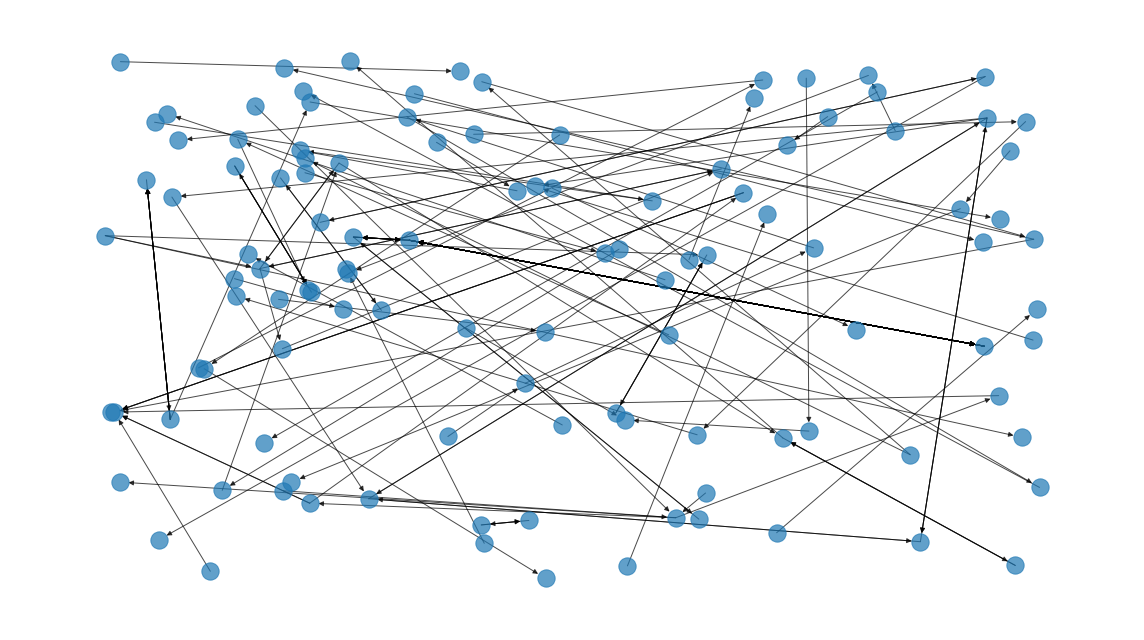

In [10]:
pos = nx.random_layout(G)
#pos = nx.kamada_kawai_layout(G, scale=100)
nx.draw_networkx(G, pos,alpha=0.7,seed=2, with_labels=False)
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.axis('off')
plt.tight_layout()

## Graph with Weighting

In [11]:
start_time="00:00:00"
end_time="01:00:00"
data_df = roam_df.where((roam_df["Time"]>=start_time) & (roam_df["Time"]<=end_time))
data_df.dropna(inplace=True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 7 columns):
Time              161 non-null object
StatusCode        161 non-null object
UserMacAddress    161 non-null object
FromMacAddress    161 non-null object
FromAPID          161 non-null float64
ToMacAddress      161 non-null object
ToAPID            161 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.9+ KB


In [12]:
#Model Each Roaming as an Edge
roam_edge=[]
for index, row in data_df.iterrows():
    roam_edge.append((row['FromMacAddress'], row['ToMacAddress']))

In [13]:
#Model the number of roam happened in the period by edge weight
edge_weight={}
for edge in roam_edge:
    if edge in edge_weight:
        edge_weight[edge]+=1
    else:
        edge_weight[edge]=1
max_value=1 #The threshold for minimum number of roam happened in that time period for the node to appear in the graph
if edge_weight:
    max_value = max(edge_weight.values())
edge_width_scaling_factor=1/max_value

In [14]:
G.clear()
G = nx.Graph() 
for key in edge_weight:
    G.add_edge(key[0],key[1],weight=edge_weight[key])

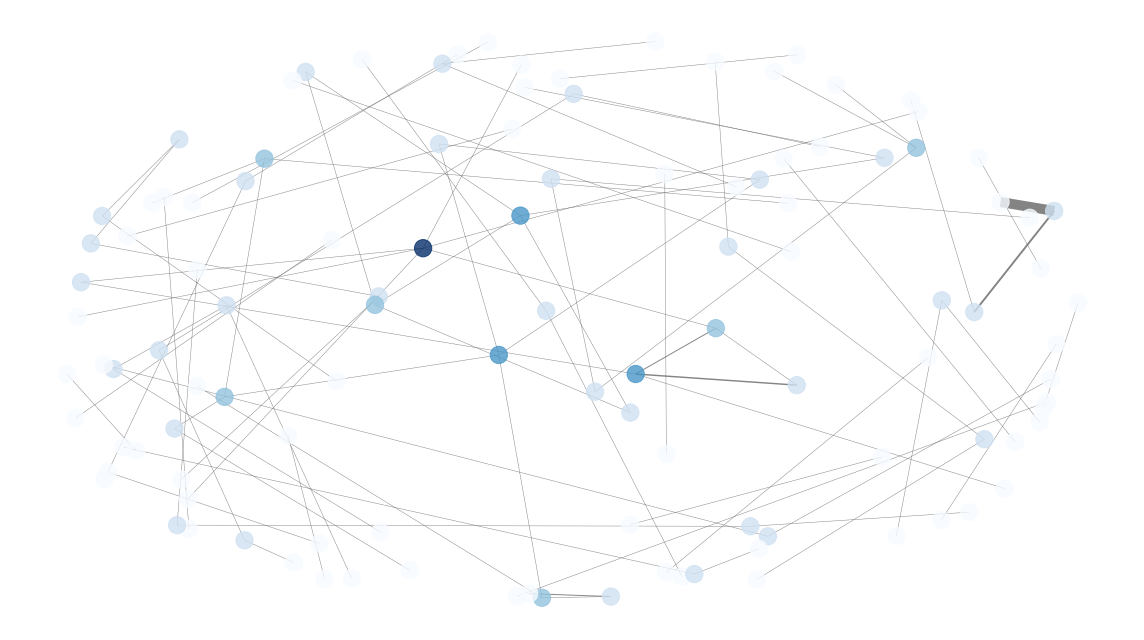

In [15]:
# Draw graph with varying node color, node size, and edge width
# Reference: https://www.cnblogs.com/zhengzhe/p/8574358.html
plt.figure(figsize=(10,7))
node_color = [G.degree(v) for v in G]
edge_width = [10*edge_width_scaling_factor*G[u][v]['weight'] for u,v in G.edges()]
pos = nx.spring_layout(G,k=0.8, seed=2)
nx.draw_networkx(G,pos,node_color=node_color, alpha=0.8, with_labels=False, width=edge_width, edge_color='.4', cmap=plt.cm.Blues)
fig = plt.gcf()
fig.set_size_inches(16,9)
plt.axis('off')
plt.tight_layout();